# Unit 3 - Lesson 6 - Supervised Learning Challenge - Housing Prices

## Import Modules and Build Initial Dataframes

In [1]:
# Import modules
from datetime import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing as preproc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler as mms
%matplotlib inline

In [2]:
# Ignore any harmless warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
# Create file objects
melbourne_less = 'MELBOURNE_HOUSE_PRICES_LESS.csv'
melbourne_full = 'Melbourne_housing_FULL.csv'

In [4]:
# Build two (2) initial dataframes based on the file objects above
less = pd.read_csv(melbourne_less)
full = pd.read_csv(melbourne_full)

## Data Definitions from Dataset Description on Kaggle.com

[https://www.kaggle.com/anthonypino/melbourne-housing-market/home](https://www.kaggle.com/anthonypino/melbourne-housing-market/home)
```
[...]
Some Key Details

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Meters

BuildingArea: Building Size in Meters

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Latitude: Self explanatory

Longitude: Self explanatory
```

## Preliminary Analysis and Cleaning / Transformations

In [5]:
# Preview of raw data for dataframe with more columns ('full')
full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# Total number of rows in 'full' dataframe
len(full)

34857

In [7]:
# View list of column names
full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
# Rename columns / Fix spelling errors
full = full.rename(columns={'Lattitude': 'Latitude', 'Longtitude': 'Longitude'})

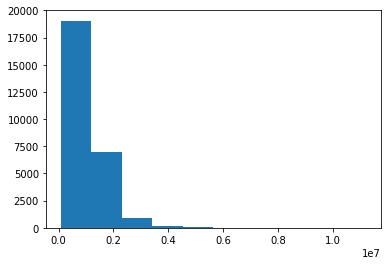

In [9]:
# View histogram of the outcome variable 'Price' for 'full' dataframe
plt.hist(full['Price'].dropna())
plt.show()

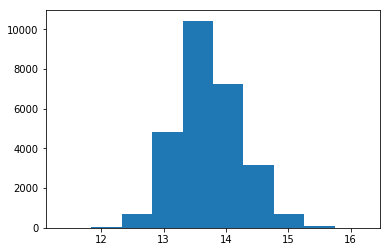

In [10]:
# Perform a log transform of the outcome variable 'Price' for 'full' dataframe 
# to achieve a more normal distribution for linear models
plt.hist(np.log(full['Price'].dropna()))
plt.show()

In [11]:
# Store the log transform of 'Price' in the 'full' dataframe
full['logPrice'] = np.log(full['Price'])

In [12]:
# View basic information about columns in the 'full' dataframe
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Latitude         26881 non-null float64
Longitude        26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
logPrice         27247 non-null float64
dtypes: float64(13), 

In [13]:
# 'full' dataframe has some columns with many null values
full.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
Regionname           3
Propertycount        3
logPrice          7610
dtype: int64

In [14]:
# Determine how many rows in the 'full' dataframe have non-null data in all columns
full.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Latitude         8887 non-null float64
Longitude        8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
logPrice         8887 non-null float64
dtypes: float64(13), int64(1), object(8)
mem

In [15]:
# Preview of raw data for dataframe with fewer columns ('less')
less.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [16]:
# Total number of rows in 'less' dataframe
len(less)

63023

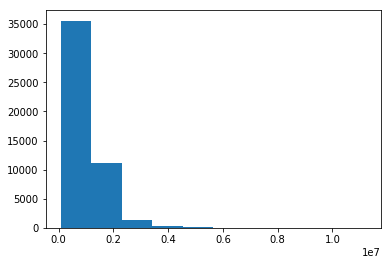

In [17]:
# View histogram of the outcome variable 'Price' for 'less' dataframe
plt.hist(less['Price'].dropna())
plt.show()

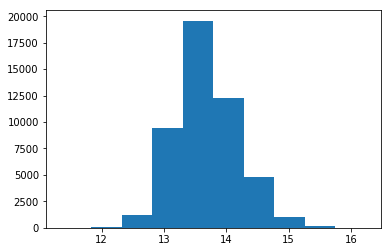

In [18]:
# Perform a log transform of the outcome variable 'Price' for 'less' dataframe 
# to achieve a more normal distribution for linear models
plt.hist(np.log(less['Price'].dropna()))
plt.show()

In [19]:
# Store the log transform of 'Price' in the 'less' dataframe
less['logPrice'] = np.log(less['Price'])

In [20]:
# View basic information about columns in the 'less' dataframe
less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 14 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
logPrice         48433 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 6.7+ MB


In [21]:
# Only the 'Price' / 'logPrice' variables in the less' dataframe have some rows with null values
less.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
logPrice         14590
dtype: int64

In [22]:
# Convert 'Date' column to datetime values for both dataframes
full['Date'] = pd.to_datetime(full['Date'], format='%d/%m/%Y')
less['Date'] = pd.to_datetime(less['Date'], format='%d/%m/%Y')

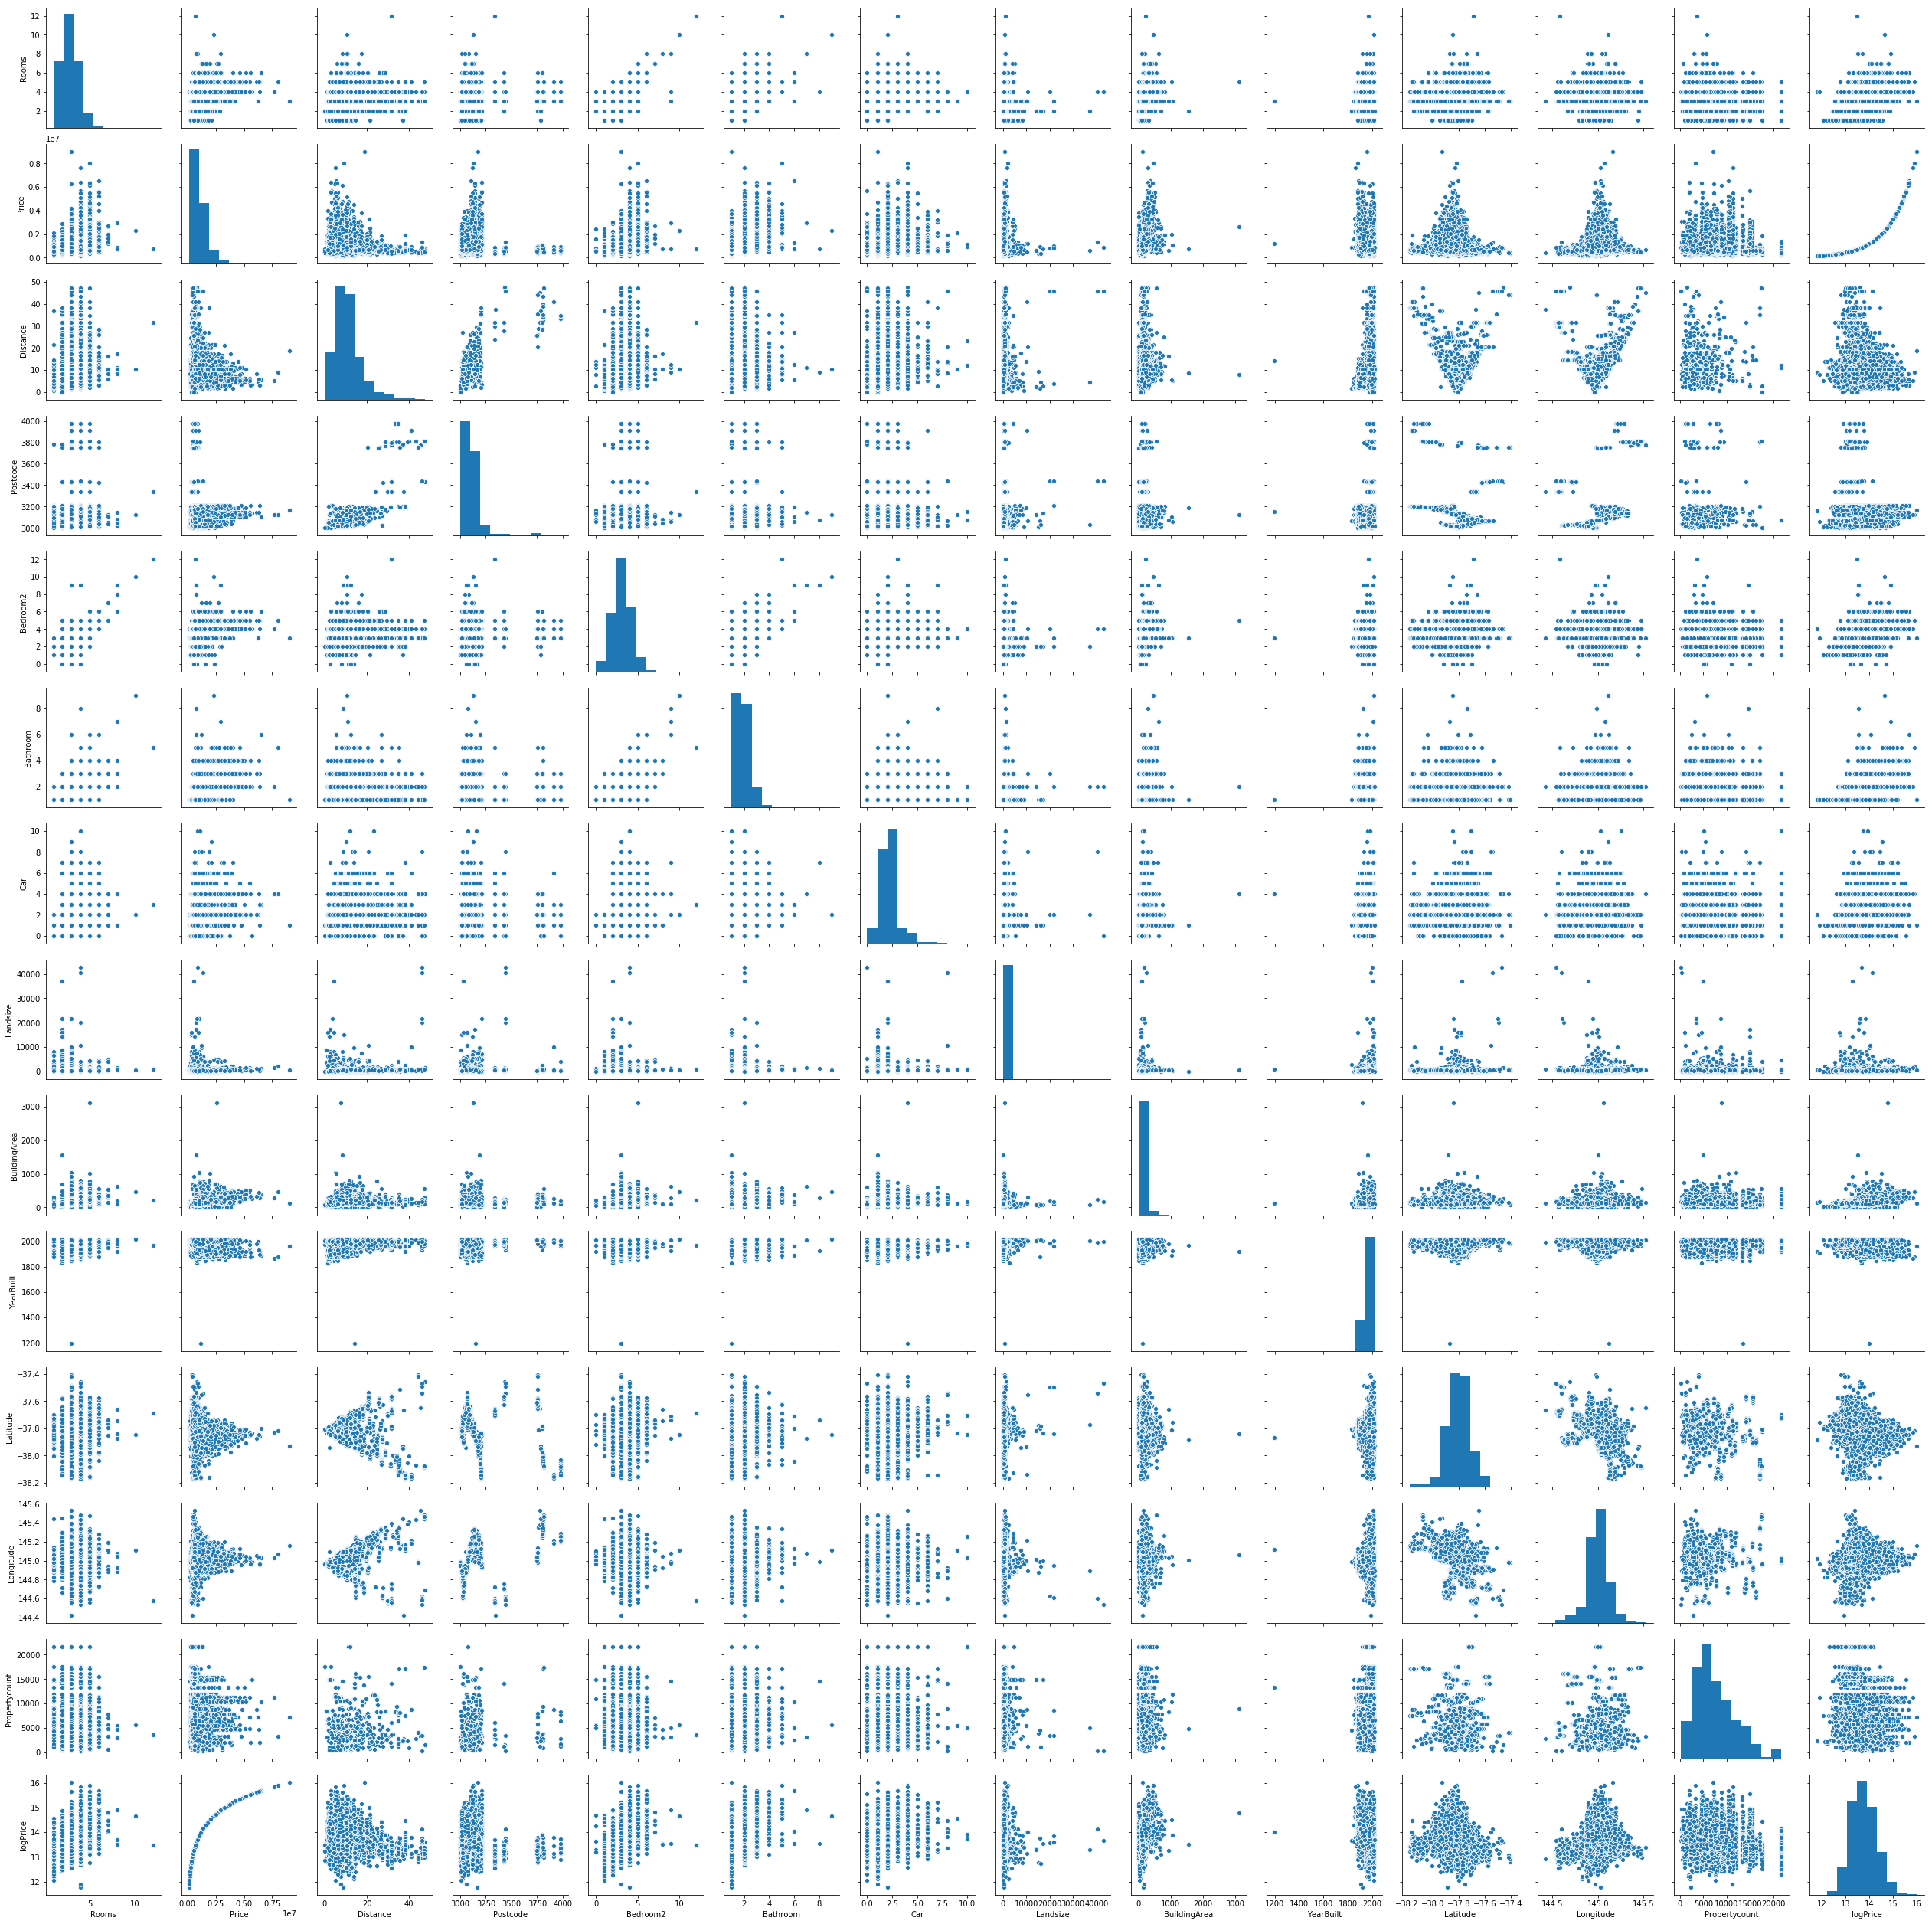

In [23]:
# View a pairplot for numerical columns in the 'full' dataframe
sns.pairplot(full.dropna())
plt.show()

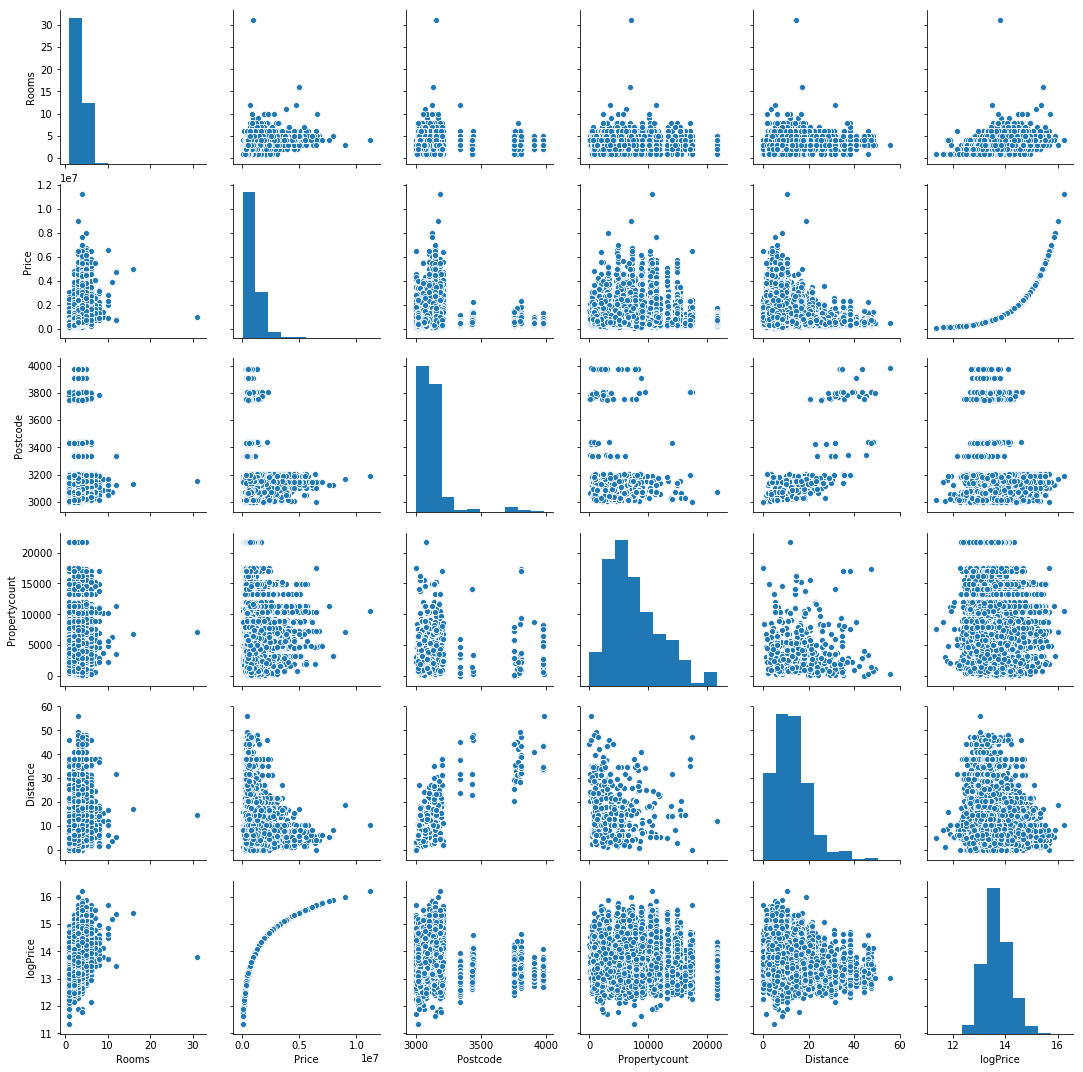

In [24]:
# View a pairplot for numerical columns in the 'less' dataframe
sns.pairplot(less.dropna())
plt.show()

## Exploratory Data Analysis (for 'full' dataframe with all null values dropped)

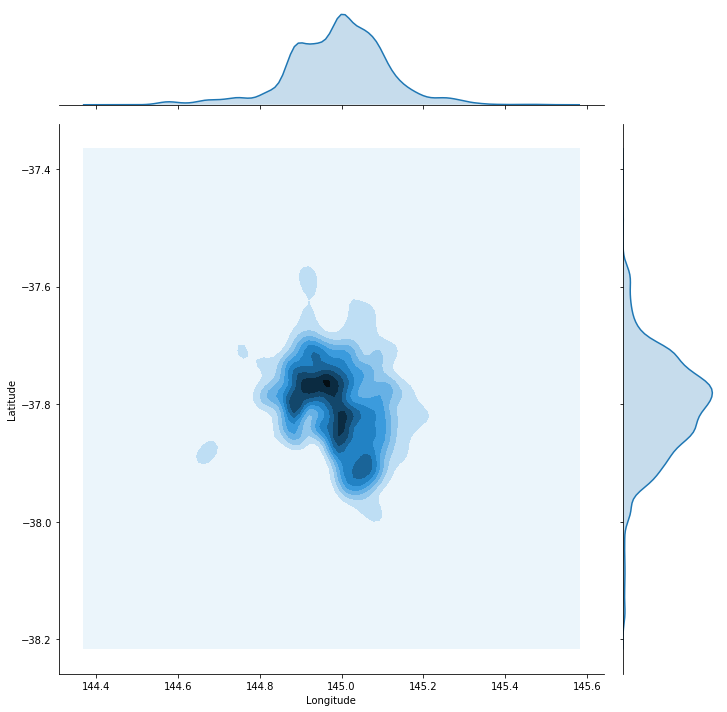

In [25]:
# Concentration of some home sales by Latitude / Longitude for 'full' dataframe (minus nulls)
g = sns.jointplot(x='Longitude', y='Latitude', data=full.dropna(), kind='kde', height=10)
plt.show()

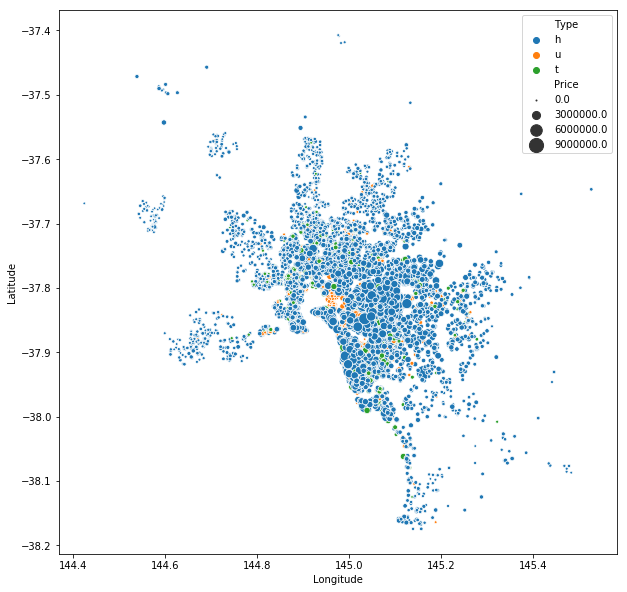

In [26]:
# Scatter-map concentration of some home sales hued by 'Type' of home and sized by its 'Price'
plt.figure(figsize=(10,10))
g = sns.scatterplot(x="Longitude", y="Latitude", hue="Type", 
                    size="Price", sizes=(1, 200), data=full.dropna())
plt.show()

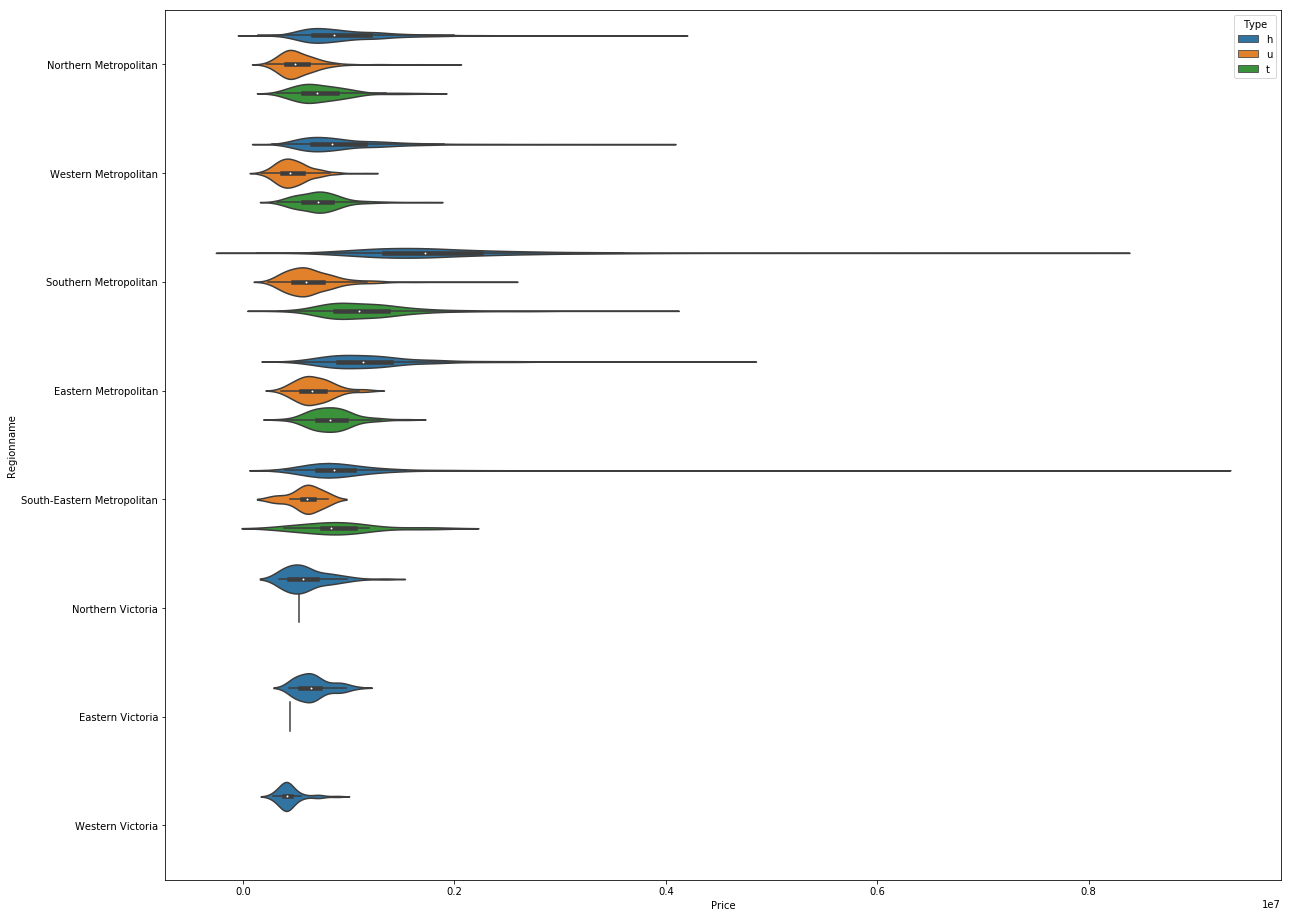

In [27]:
# Range of home prices hued by type and split by region
plt.figure(figsize=(20,16))
sns.violinplot(x='Price', y='Regionname', hue='Type', data=full.dropna(), orient='h')
plt.show()

## T-test of log-transformed 'Price' values for the 'full' and 'less' dataframes

In [28]:
# Size of 'full' dataframe after dropping the null values in the 'logPrice' column
# This allows for a larger sample for the t-test (27,247 values, instead of only 8,887)
len(full['logPrice'].dropna())

27247

In [29]:
# Size of 'less' dataframe after dropping the null values in the 'logPrice' column
len(less['logPrice'].dropna())

48433

In [30]:
pop_full_log_prices = full['logPrice'].dropna()
pop_less_log_prices = less['logPrice'].dropna()

t_stats = []
p_vals = []
for i in range(10000):
    
    # I used:  https://www.qualtrics.com/blog/calculating-sample-size/ 
    # to determine ideal sample sizes
    # Total 'logPrice' rows in 'full' = 27247; total 'logPrice' rows in 'less' = 48433
    sample_full_log_prices = np.random.choice(pop_full_log_prices, 379, replace=False)
    sample_less_log_prices = np.random.choice(pop_less_log_prices, 382, replace=False)

    ttest = ttest_ind(sample_full_log_prices, sample_less_log_prices, equal_var=False)
    
    t_stats.append(ttest.statistic)
    p_vals.append(ttest.pvalue)

In [31]:
# After 10,000 iterations of sampling and averaging the p_values
avg_ttest_statistic = sum(t_stats) / len(t_stats)
avg_p_val = sum(p_vals) / len(p_vals)
print("Average t-statistic: ", avg_ttest_statistic)
print("Average p-value:     ", avg_p_val)
print('\n')
print('The relatively high p-value of {:1.3f} indicates that there is not \
strong evidence against the null hypothesis that the two samples \
come from the same distribution. We cannot reject the null hypothesis. This \
implies that we can build one model to predict home prices that may work for \
both sets of data.'.format(avg_p_val))

Average t-statistic:  1.1530299559643744
Average p-value:      0.3280978524765222


The relatively high p-value of 0.328 indicates that there is not strong evidence against the null hypothesis that the two samples come from the same distribution. We cannot reject the null hypothesis. This implies that we can build one model to predict home prices that may work for both sets of data.


## Basic Multivariable Linear Regression (for 'full' dataframe with all null values dropped)

In [32]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
y = full.dropna()['logPrice']
X = full.dropna().drop(['Price','logPrice','Suburb','Address','Rooms','Type',
                        'Method','SellerG','Date','Postcode','Regionname',
                        'CouncilArea'], axis=1)

regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [-2.84407646e-02  1.80857381e-01  1.24711799e-01  4.65013605e-02
  2.40993352e-05  1.41853510e-03 -4.16559360e-03 -9.97967100e-01
  8.42874551e-01 -4.09433091e-06]

Intercept: 
 -138.71070200597413

R-squared:
0.67210177716849


## Assumptions of Multivariable Linear Regression

### Assumption One: Linear relationship with all variables

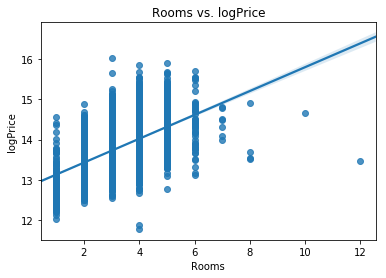

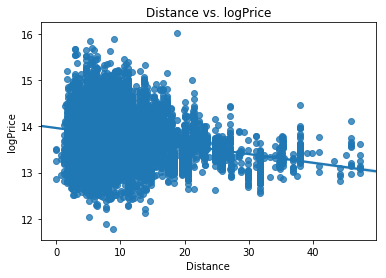

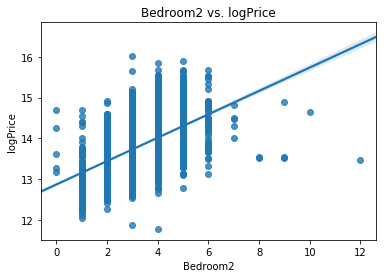

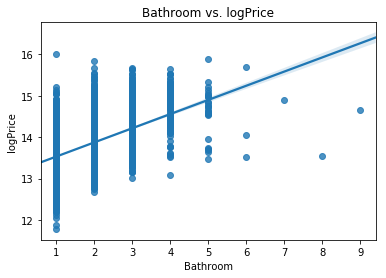

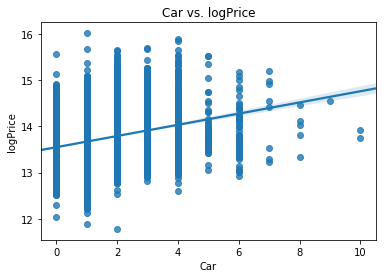

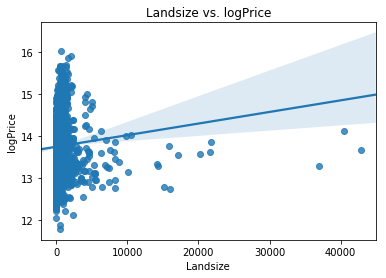

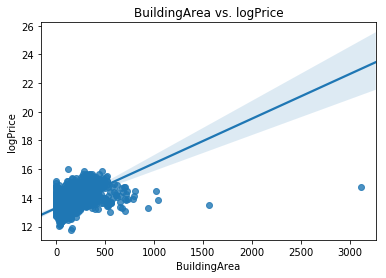

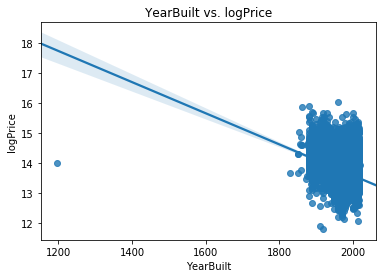

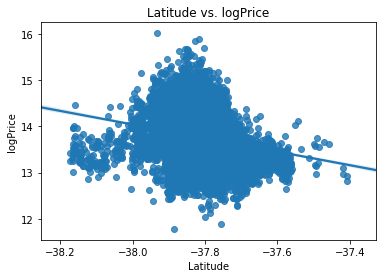

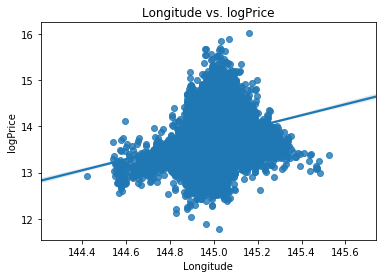

In [33]:
sns.regplot(x='Rooms', y='logPrice', data=full.dropna())
plt.title('Rooms vs. logPrice')
plt.show()

sns.regplot(x='Distance', y='logPrice', data=full.dropna())
plt.title('Distance vs. logPrice')
plt.show()

sns.regplot(x='Bedroom2', y='logPrice', data=full.dropna())
plt.title('Bedroom2 vs. logPrice')
plt.show()

sns.regplot(x='Bathroom', y='logPrice', data=full.dropna())
plt.title('Bathroom vs. logPrice')
plt.show()

sns.regplot(x='Car', y='logPrice', data=full.dropna())
plt.title('Car vs. logPrice')
plt.show()

sns.regplot(x='Landsize', y='logPrice', data=full.dropna())
plt.title('Landsize vs. logPrice')
plt.show()

sns.regplot(x='BuildingArea', y='logPrice', data=full.dropna())
plt.title('BuildingArea vs. logPrice')
plt.show()

sns.regplot(x='YearBuilt', y='logPrice', data=full.dropna())
plt.title('YearBuilt vs. logPrice')
plt.show()

sns.regplot(x='Latitude', y='logPrice', data=full.dropna())
plt.title('Latitude vs. logPrice')
plt.show()

sns.regplot(x='Longitude', y='logPrice', data=full.dropna())
plt.title('Longitude vs. logPrice')
plt.show()

### Assumption Two: Multivariate normality

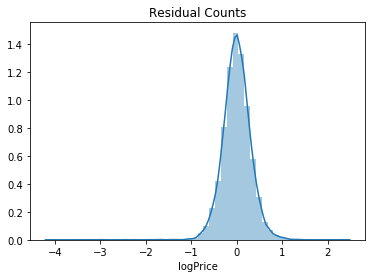

In [34]:
pred = regr.predict(X).ravel()
actual = y

residual = actual - pred

sns.distplot(residual)
plt.title('Residual Counts')
plt.show()

### Assumption Three: Scedasticity

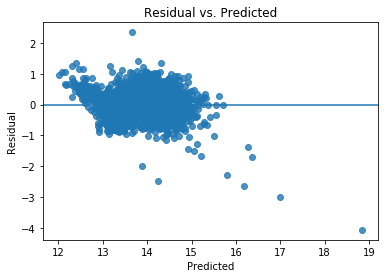

In [35]:
sns.regplot(x=pred, y=residual, fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Assumption Four: Low multicollinearity

In [36]:
corrmat = full.dropna().corr()
display(corrmat)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,logPrice
Rooms,1.000000,0.475074,0.276585,0.084236,0.964465,0.624070,0.401423,0.101158,0.606738,0.006935,0.018758,0.083016,-0.082797,0.532756
Price,0.475074,1.000000,-0.231212,0.046033,0.460880,0.463501,0.209464,0.058375,0.507284,-0.313664,-0.224255,0.212174,-0.059720,0.925781
Distance,0.276585,-0.231212,1.000000,0.489537,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941,-0.003247,-0.239159
Postcode,0.084236,0.046033,0.489537,1.000000,0.087286,0.111617,0.055531,0.069623,0.077091,0.089913,-0.195081,0.358005,0.032758,0.025285
Bedroom2,0.964465,0.460880,0.283460,0.087286,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671,-0.081392,0.517212
Bathroom,0.624070,0.463501,0.122132,0.111617,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268,-0.058324,0.461755
Car,0.401423,0.209464,0.259374,0.055531,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589,-0.031285,0.220645
Landsize,0.101158,0.058375,0.138559,0.069623,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196,-0.032548,0.054782
BuildingArea,0.606738,0.507284,0.135509,0.077091,0.595299,0.553855,0.317593,0.083229,1.000000,0.059936,-0.034626,0.097635,-0.059024,0.511586
YearBuilt,0.006935,-0.313664,0.313383,0.089913,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886,0.017224,-0.359187


## Feature Engineering

In [37]:
full_feats = full.copy()
less_feats = less.copy()

In [38]:
len(full)

34857

In [39]:
full_feats = full_feats.dropna(subset=['Distance','Postcode','CouncilArea','Regionname','Propertycount'])
len(full_feats)

34854

In [40]:
# Convert floats to strs in 'Postcode' column to allow for one-hot encoding of this categorical column
dfs = [full_feats, less_feats]
for df in dfs:
    df['Postcode'] = df['Postcode'].astype(int).astype(str)

In [41]:
# Add columns to the new dataframes based on one-hot encoded features from categorical columns 
full_feats = pd.concat([full_feats, pd.get_dummies(full_feats[['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea', 'Regionname']])], axis=1)
less_feats = pd.concat([less_feats, pd.get_dummies(less_feats[['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea', 'Regionname']])], axis=1)

In [42]:
# Split Address column into number and street name columns
full_feats['Address_num'], full_feats['Address_st'] = full_feats['Address'].str.split(' ', 1).str
less_feats['Address_num'], less_feats['Address_st'] = less_feats['Address'].str.split(' ', 1).str

In [43]:
# Split datetime objects in the 'Date' column into 'Day', 'Month', and 'Year' values
full_feats['Day'] = pd.DatetimeIndex(full_feats['Date']).day.astype('int64')
full_feats['Month'] = pd.DatetimeIndex(full_feats['Date']).month.astype('int64')
full_feats['Year'] = pd.DatetimeIndex(full_feats['Date']).year.astype('int64')
#full_feats['Day'] = full_feats['Day'].astype('int64')
#full_feats['Month'] = full_feats['Month'].astype('int64')
#full_feats['Year'] = full_feats['Year'].astype('int64')

less_feats['Day'] = pd.DatetimeIndex(less_feats['Date']).day.astype('int64')
less_feats['Month'] = pd.DatetimeIndex(less_feats['Date']).month.astype('int64')
less_feats['Year'] = pd.DatetimeIndex(less_feats['Date']).year.astype('int64')
#less_feats['Day'] = less_feats['Day'].astype('int64')
#less_feats['Month'] = less_feats['Month'].astype('int64')
#less_feats['Year'] = less_feats['Year'].astype('int64')

In [44]:
# Source: https://www.orangefinance.net.au/historical-interest-rates/
rates = pd.read_csv('au_home_loan_rates_2016_2018.csv')

In [45]:
# Define function to add a 'Rates' column to each dataframe
def add_rates(x, rates=rates):
    return rates[(rates['mo'] == x['Month']) & (rates['year'] == x['Year'])]['rate'].iloc[0] / 100

In [46]:
# Add 'Rate' column to 'full_feats' dataframe
full_feats['Rate'] = full_feats[['Month', 'Year']].apply(add_rates, axis=1)

In [47]:
# Add 'Rate' column to 'less_feats' dataframe
# The website with home loan rate data only has data through July 2018; ignore data after July 2018
# Reduces from 63,023 to 57,825 rows
less_feats = less_feats[less_feats['Date'] < '2018-08-01']
less_feats['Rate'] = less_feats[['Month', 'Year']].apply(add_rates, axis=1)

In [48]:
# Create a duplicate dataframe of features for the 'full' dataset.

# The 'less_feats' and 'full_feats' dataframes will be built using similar 
# methodologies so that they can be more easily compared during model testing.
# The number of columns in each dataframe will differ due to slightly different 
# sets of values in the categorical columns being one-hot encoded.

# The 'full_feats_2' dataframe will include more of the original features 
# from the 'full' dataset and as well as their corresponding polynomial features.
# This will let us determine whether adding the additional features helps to
# build a better predictive model.
full_feats_2 = full_feats.copy()

In [49]:
# Add polynomial features to the 'full_feats' dataframe to test for interactions between variables
# 'Rooms', 'Distance', 'Propertycount', and 'Rate' variables also appear in the 'less_feats' dataframe
full_feats_subset = full_feats[['Rooms','Distance','Propertycount','Rate']]
list_full_feats_subset = list(full_feats_subset)

for first in range(len(full_feats_subset.columns)):
    start = full_feats_subset.columns[first]
    for col in full_feats_subset.columns[first:]:
        if start in full_feats_subset.columns or col in full_feats_subset.columns:
            full_feats[start + '_' + col] = full_feats_subset[start] * full_feats_subset[col]
            list_full_feats_subset.append(start + '_' + col)
        else:
            pass

In [50]:
# Add polynomial features to the 'full_feats_2' dataframe to test for interactions between variables
full_feats_2_subset = full_feats_2[['Rooms','Distance','Bedroom2','Bathroom','Car',
                                    'Landsize','BuildingArea','YearBuilt','Latitude',
                                    'Longitude','Propertycount','Rate']]
list_full_feats_2_subset = list(full_feats_2_subset)

for first in range(len(full_feats_2_subset.columns)):
    start = full_feats_2_subset.columns[first]
    for col in full_feats_2_subset.columns[first:]:
        if start in full_feats_2_subset.columns or col in full_feats_2_subset.columns:
            full_feats_2[start + '_' + col] = full_feats_2_subset[start] * full_feats_2_subset[col]
            list_full_feats_2_subset.append(start + '_' + col)
        else:
            pass

In [51]:
# Add polynomial features to the 'less_feats' dataframe to test for interactions between variables
less_feats_subset = less_feats[['Rooms','Distance','Propertycount','Rate']]
list_less_feats_subset = list(less_feats_subset)

for first in range(len(less_feats_subset.columns)):
    start = less_feats_subset.columns[first]
    for col in less_feats_subset.columns[first:]:
        if start in less_feats_subset.columns or col in less_feats_subset.columns:
            less_feats[start + '_' + col] = less_feats_subset[start] * less_feats_subset[col]
            list_less_feats_subset.append(start + '_' + col)
        else:
            pass

##  Feature Scaling

In [52]:
# Minmax scale numerical features in the 'full_feats' dataframe
full_scaled = full_feats.copy()
list_full_feats_subset.extend(['Day','Month','Year'])

for col in list_full_feats_subset:
    full_scaled[col] = preproc.minmax_scale(full_feats[[col]])
    
full_scaled.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Rooms_Rooms,Rooms_Distance,Rooms_Propertycount,Rooms_Rate,Distance_Distance,Distance_Propertycount,Distance_Rate,Propertycount_Propertycount,Propertycount_Rate,Rate_Rate
0,Abbotsford,68 Studley St,0.066667,h,NaN,SS,Jellis,2016-09-03,0.051975,3067,...,0.011765,0.013144,0.043967,0.069204,0.002701,0.012219,0.052075,0.034446,0.167456,0.21256
1,Abbotsford,85 Turner St,0.066667,h,1480000.0,S,Biggin,2016-12-03,0.051975,3067,...,0.011765,0.013144,0.043967,0.067474,0.002701,0.012219,0.051407,0.034446,0.165265,0.10559
2,Abbotsford,25 Bloomburg St,0.066667,h,1035000.0,S,Biggin,2016-02-04,0.051975,3067,...,0.011765,0.013144,0.043967,0.081315,0.002701,0.012219,0.056748,0.034446,0.182797,1.00000
3,Abbotsford,18/659 Victoria St,0.133333,u,NaN,VB,Rounds,2016-02-04,0.051975,3067,...,0.031373,0.019716,0.066991,0.154844,0.002701,0.012219,0.056748,0.034446,0.182797,1.00000
4,Abbotsford,5 Charles St,0.133333,h,1465000.0,SP,Biggin,2017-03-04,0.051975,3067,...,0.031373,0.019716,0.066991,0.136678,0.002701,0.012219,0.052075,0.034446,0.167456,0.21256


In [53]:
# Minmax scale numerical features in the 'full_feats_2' dataframe
full_2_scaled = full_feats_2.copy()
list_full_feats_2_subset.extend(['Day','Month','Year'])

for col in list_full_feats_2_subset:
    full_2_scaled[col] = preproc.minmax_scale(full_feats_2[[col]])
    
full_2_scaled.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Latitude_Latitude,Latitude_Longitude,Latitude_Propertycount,Latitude_Rate,Longitude_Longitude,Longitude_Propertycount,Longitude_Rate,Propertycount_Propertycount,Propertycount_Rate,Rate_Rate
0,Abbotsford,68 Studley St,0.066667,h,NaN,SS,Jellis,2016-09-03,0.051975,3067,...,0.511207,0.483505,0.817149,0.721297,0.517852,0.182454,0.240157,0.034446,0.167456,0.21256
1,Abbotsford,85 Turner St,0.066667,h,1480000.0,S,Biggin,2016-12-03,0.051975,3067,...,0.508957,0.484777,0.817158,0.820255,0.520211,0.182458,0.133083,0.034446,0.165265,0.10559
2,Abbotsford,25 Bloomburg St,0.066667,h,1035000.0,S,Biggin,2016-02-04,0.051975,3067,...,0.519333,0.476846,0.817117,0.029686,0.515675,0.182451,0.990559,0.034446,0.182797,1.00000
3,Abbotsford,18/659 Victoria St,0.133333,u,NaN,VB,Rounds,2016-02-04,0.051975,3067,...,0.523709,0.467498,0.817100,0.028910,0.532186,0.182475,0.991703,0.034446,0.182797,1.00000
4,Abbotsford,5 Charles St,0.133333,h,1465000.0,SP,Biggin,2017-03-04,0.051975,3067,...,0.521083,0.474963,0.817110,0.719690,0.516582,0.182452,0.240076,0.034446,0.167456,0.21256


In [54]:
# Minmax scale numerical features in the 'less_feats' dataframe
less_scaled = less_feats.copy()
list_less_feats_subset.extend(['Day','Month','Year'])

for col in list_less_feats_subset:
    less_scaled[col] = preproc.minmax_scale(less_feats[[col]])

less_scaled.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Rooms_Rooms,Rooms_Distance,Rooms_Propertycount,Rooms_Rate,Distance_Distance,Distance_Propertycount,Distance_Rate,Propertycount_Propertycount,Propertycount_Rate,Rate_Rate
0,Abbotsford,49 Lithgow St,0.066667,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,...,0.008333,0.019750,0.054247,0.066119,0.002190,0.014663,0.045646,0.034457,0.171197,0.320911
1,Abbotsford,59A Turner St,0.066667,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,...,0.008333,0.019750,0.054247,0.066119,0.002190,0.014663,0.045646,0.034457,0.171197,0.320911
2,Abbotsford,119B Yarra St,0.066667,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,...,0.008333,0.019750,0.054247,0.066119,0.002190,0.014663,0.045646,0.034457,0.171197,0.320911
3,Aberfeldie,68 Vida St,0.066667,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,...,0.008333,0.049375,0.020389,0.066119,0.013690,0.014074,0.114116,0.005076,0.064733,0.320911
4,Airport West,92 Clydesdale Rd,0.033333,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,...,0.003125,0.045644,0.030868,0.033676,0.026324,0.043813,0.158240,0.025597,0.147333,0.320911


In [55]:
full_scaled.shape

(34854, 1040)

In [56]:
full_2_scaled.shape

(34854, 1108)

In [57]:
less_scaled.shape

(57825, 1165)

## Prepare Independent & Dependent Variables for Scaled Dataframes

###### 'full_scaled' DataFrame

In [58]:
# Drop null values in the 'Price' and 'logPrice' columns in the 'full_scaled' dataframe.
# Reduces from 34,854 to 27,244 rows
full_scaled = full_scaled.dropna(subset=['Price','logPrice'])

In [59]:
# Drop 'Price', 'logPrice', and other categorical columns that were one-hot encoded to build the 
# independent variable for model testing.
# Also drop some numerical columns that do not appear in the 'less' dataset for comparison purposes 
# during model testing.
X_full = full_scaled.drop(['Price','logPrice','Suburb','Address','Address_num',
                           'Address_st','Type','Method','SellerG','Date','Postcode',
                           'Regionname','CouncilArea','Bedroom2','Bathroom','Car',
                           'Landsize','BuildingArea','YearBuilt','Latitude','Longitude'], axis=1)

# Build the dependent variable based on the log transformation of the 'Price' variable
y_full = full_scaled['logPrice']

###### 'full_2_scaled' DataFrame

In [60]:
# Drop all null values in the 'full_2_scaled' dataframe.
# Reduces from 34,854 to 8,887 rows
full_2_scaled_non_imputed = full_2_scaled.dropna()

In [61]:
# Drop 'Price', 'logPrice', and other categorical columns that were one-hot encoded to build the
# independent variable for model testing.
# Keep numerical columns from the original 'full' dataset that do not appear in the 'less' dataset.
# Models tested with these variables will be compared to models using variables from the 
# 'full_scaled' and 'less_scaled' DataFrames.
X_full_2 = full_2_scaled_non_imputed.drop(['Price','logPrice','Suburb','Address','Address_num',
                                           'Address_st','Type','Method','SellerG','Date',
                                           'Postcode','Regionname','CouncilArea'], axis=1)

# Build the dependent variable based on the log transformation of the 'Price' variable
y_full_2 = full_2_scaled_non_imputed['logPrice']

###### 'less_scaled' DataFrame

In [62]:
# Drop null values in the 'Price' and 'logPrice' columns in the 'less_scaled' dataframe.
# Reduces from 57,825 to 44,793 rows
less_scaled = less_scaled.dropna(subset=['Price','logPrice'])

In [63]:
# Drop 'Price', 'logPrice', and other categorical columns that were one-hot encoded to build the 
# independent variable for model testing.
X_less = less_scaled.drop(['Price','logPrice','Suburb','Address','Address_num',
                           'Address_st','Type','Method','SellerG','Date','Postcode',
                           'Regionname','CouncilArea'], axis=1)

# Build the dependent variable based on the log transformation of the 'Price' variable
y_less = less_scaled['logPrice']

###### Check Variable Dimensions

In [64]:
X_full.shape

(27244, 1019)

In [65]:
y_full.shape

(27244,)

In [66]:
X_full_2.shape

(8887, 1095)

In [67]:
y_full_2.shape

(8887,)

In [68]:
X_less.shape

(44793, 1152)

In [69]:
y_less.shape

(44793,)

## Test Different Models On the Independent & Dependent Variables

### Ridge Regression

In [70]:
def ridge(X, y, alpha):
    ridge = linear_model.Ridge(alpha=alpha) 
    ridge.fit(X, y)
    print('\n\nAlpha: ', alpha)
    print('\nR^2 Score: \n', ridge.score(X, y))
    #origparams = ridgeregr.coef_
    #print('\nCoefficients: \n', origparams)
    #intercept = ridgeregr.intercept_
    #print('\nIntercept: \n', intercept)
    print('\nCross validation scores (5 folds): ')
    cv = cross_val_score(ridge, X, y, cv=5)
    print(cv)
    print('\nAverage from CV: ', np.mean(cv))

###### Ridge - 'X_less', 'y_less'

In [71]:
alf = list(np.arange(0,1.5,0.25))
for a in alf:
    ridge(X_less, y_less, a)



Alpha:  0.0

R^2 Score: 
 0.7837072903693652

Cross validation scores (5 folds): 
[-1.57450877e+25 -9.51210845e+24 -1.16836527e+25 -8.84275093e+24
 -1.56110092e+25]

Average from CV:  -1.2278921800683342e+25


Alpha:  0.25

R^2 Score: 
 0.7975617407134945

Cross validation scores (5 folds): 
[0.78343647 0.79383498 0.79277534 0.78736936 0.78573162]

Average from CV:  0.78862955311085


Alpha:  0.5

R^2 Score: 
 0.7964479071513787

Cross validation scores (5 folds): 
[0.78282126 0.79327937 0.79178313 0.78643458 0.7812654 ]

Average from CV:  0.7871167500154743


Alpha:  0.75

R^2 Score: 
 0.7954580060172818

Cross validation scores (5 folds): 
[0.78227681 0.79278288 0.79100442 0.78571175 0.77804846]

Average from CV:  0.7859648653705846


Alpha:  1.0

R^2 Score: 
 0.7945848321100264

Cross validation scores (5 folds): 
[0.78176549 0.79230028 0.79039504 0.78508752 0.77587289]

Average from CV:  0.7850842427064045


Alpha:  1.25

R^2 Score: 
 0.7938012490881294

Cross validation scores (

###### Ridge - 'X_full', 'y_full'

In [72]:
alf = list(np.arange(0,1.5,0.25))
for a in alf:
    ridge(X_full, y_full, a)



Alpha:  0.0

R^2 Score: 
 0.79378670957241

Cross validation scores (5 folds): 
[-2.82686812e+25 -3.81778091e+25 -6.27706294e+25 -7.19623504e+25
 -7.21261121e+25]

Average from CV:  -5.466111645342133e+25


Alpha:  0.25

R^2 Score: 
 0.8069259495228613

Cross validation scores (5 folds): 
[0.79778808 0.76473815 0.79812286 0.79518583 0.79021087]

Average from CV:  0.7892091579928547


Alpha:  0.5

R^2 Score: 
 0.8063142674430137

Cross validation scores (5 folds): 
[0.79726028 0.76372935 0.79742866 0.79919697 0.79047338]

Average from CV:  0.7896177274112436


Alpha:  0.75

R^2 Score: 
 0.8056569756689222

Cross validation scores (5 folds): 
[0.79670032 0.76291321 0.79666777 0.8008472  0.79034491]

Average from CV:  0.7894946805799392


Alpha:  1.0

R^2 Score: 
 0.8050006161958732

Cross validation scores (5 folds): 
[0.79615242 0.76222248 0.79590204 0.80147932 0.79006938]

Average from CV:  0.7891651276151992


Alpha:  1.25

R^2 Score: 
 0.8043649044079105

Cross validation scores (5

###### Ridge - 'X_full_2', 'y_full_2'

In [73]:
alf = list(np.arange(0,2.5,0.25))
for a in alf:
    ridge(X_full_2, y_full_2, a)



Alpha:  0.0

R^2 Score: 
 0.8647771021672506

Cross validation scores (5 folds): 
[-7.42584950e+25 -6.66995428e+25 -1.03440522e+26 -3.27946353e+26
 -3.69922174e+26]

Average from CV:  -1.8845341728991682e+26


Alpha:  0.25

R^2 Score: 
 0.8653152872959559

Cross validation scores (5 folds): 
[0.81851377 0.83091579 0.81800297 0.83434502 0.85449452]

Average from CV:  0.8312544144555982


Alpha:  0.5

R^2 Score: 
 0.8639602562425336

Cross validation scores (5 folds): 
[0.82059572 0.83193314 0.81813214 0.83409237 0.86012585]

Average from CV:  0.8329758434558858


Alpha:  0.75

R^2 Score: 
 0.8627915581421151

Cross validation scores (5 folds): 
[0.82200862 0.8322568  0.81788127 0.83364298 0.86257056]

Average from CV:  0.833672046805549


Alpha:  1.0

R^2 Score: 
 0.8617277080186299

Cross validation scores (5 folds): 
[0.82293289 0.83223856 0.81743699 0.83310652 0.86368005]

Average from CV:  0.8338790033403696


Alpha:  1.25

R^2 Score: 
 0.8607440412135724

Cross validation scores 

###### Ridge Regression - Best performers:
- **'X_less', 'y_less'** - Alpha=**0.25**, Average R^2 from CV=**0.7886**
- **'X_full', 'y_full'** - Alpha=**0.5**, Average R^2 from CV=**0.7896**
- **'X_full_2', 'y_full_2'** - Alpha=**1.0**, Average R^2 from CV=**0.8339**

### Lasso Regression

In [74]:
def lasso(X, y, alpha):
    lasso = linear_model.Lasso(alpha=alpha) 
    lasso.fit(X, y)
    print('\n\nAlpha: ', alpha)
    print('\nR^2 Score: \n', lasso.score(X, y))
    #origparams = lasso.coef_
    #print('\nCoefficients: \n', origparams)
    #intercept = lasso.intercept_
    #print('\nIntercept: \n', intercept)
    print('\nCross validation scores (5 folds): ')
    cv = cross_val_score(lasso, X, y, cv=5)
    print(cv)
    print('\nAverage from CV: ', np.mean(cv))

###### Lasso - 'X_less', 'y_less'

In [75]:
alf = list(np.arange(0,0.0005,0.00005))
for a in alf:
    lasso(X_less, y_less, a)



Alpha:  0.0

R^2 Score: 
 0.798074788955493

Cross validation scores (5 folds): 
[0.78432639 0.79394349 0.79360593 0.78782571 0.64379461]

Average from CV:  0.7606992249253965


Alpha:  5e-05

R^2 Score: 
 0.7917732588425892

Cross validation scores (5 folds): 
[0.78333892 0.79308598 0.79220311 0.78589429 0.77490173]

Average from CV:  0.7858848054669894


Alpha:  0.0001

R^2 Score: 
 0.7855899245878721

Cross validation scores (5 folds): 
[0.77877154 0.78838567 0.78862369 0.78153093 0.76861026]

Average from CV:  0.7811844179523482


Alpha:  0.00015000000000000001

R^2 Score: 
 0.7797812485375446

Cross validation scores (5 folds): 
[0.77351725 0.78324099 0.78447526 0.77665274 0.76513963]

Average from CV:  0.7766051748888395


Alpha:  0.0002

R^2 Score: 
 0.7756086638074299

Cross validation scores (5 folds): 
[0.76944408 0.77942377 0.78103867 0.77279178 0.76129951]

Average from CV:  0.7727995613750118


Alpha:  0.00025

R^2 Score: 
 0.771418212631597

Cross validation scores (5 f

###### Lasso - 'X_full', 'y_full'

In [76]:
alf = list(np.arange(0,0.0005,0.00005))
for a in alf:
    lasso(X_full, y_full, a)



Alpha:  0.0

R^2 Score: 
 0.8071921078902319

Cross validation scores (5 folds): 
[0.79816524 0.765939   0.79367969 0.78350711 0.78353625]

Average from CV:  0.7849654570749847


Alpha:  5e-05

R^2 Score: 
 0.8024072039391021

Cross validation scores (5 folds): 
[0.79747813 0.76613821 0.79791558 0.79636841 0.7912725 ]

Average from CV:  0.7898345666863567


Alpha:  0.0001

R^2 Score: 
 0.7982930136968784

Cross validation scores (5 folds): 
[0.79411836 0.76252937 0.79306135 0.7981503  0.7873029 ]

Average from CV:  0.7870324547691514


Alpha:  0.00015000000000000001

R^2 Score: 
 0.7935898121476358

Cross validation scores (5 folds): 
[0.7898208  0.7565771  0.78787037 0.79531566 0.78307204]

Average from CV:  0.7825311944116429


Alpha:  0.0002

R^2 Score: 
 0.7882175322971441

Cross validation scores (5 folds): 
[0.78469098 0.74938169 0.78251206 0.7890538  0.7779132 ]

Average from CV:  0.7767103463856221


Alpha:  0.00025

R^2 Score: 
 0.7841056837604408

Cross validation scores (5

###### Lasso - 'X_full_2', 'y_full_2'

In [77]:
alf = list(np.arange(0,0.0005,0.00005))
for a in alf:
    lasso(X_full_2, y_full_2, a)



Alpha:  0.0

R^2 Score: 
 0.8774554647646311

Cross validation scores (5 folds): 
[0.24966979 0.83647673 0.74046786 0.80640067 0.64771695]

Average from CV:  0.6561464000032484


Alpha:  5e-05

R^2 Score: 
 0.8603221796661022

Cross validation scores (5 folds): 
[0.81857192 0.83384887 0.82212547 0.83985727 0.85248516]

Average from CV:  0.8333777381161674


Alpha:  0.0001

R^2 Score: 
 0.8550583396591137

Cross validation scores (5 folds): 
[0.8157218  0.83271302 0.81875109 0.83698467 0.85654408]

Average from CV:  0.8321429318163984


Alpha:  0.00015000000000000001

R^2 Score: 
 0.8495841793887169

Cross validation scores (5 folds): 
[0.81074971 0.82920533 0.81250132 0.83302452 0.85678412]

Average from CV:  0.8284530017701275


Alpha:  0.0002

R^2 Score: 
 0.8434200024829277

Cross validation scores (5 folds): 
[0.80545114 0.824495   0.80725831 0.82819458 0.85287952]

Average from CV:  0.8236557110512372


Alpha:  0.00025

R^2 Score: 
 0.8396873015530016

Cross validation scores (5

###### Lasso Regression - Best performers:
- 'X_less', 'y_less' - Alpha=**0.00005**, Average R^2 from CV=**0.7859**
- 'X_full', 'y_full' - Alpha=**0.00005**, Average R^2 from CV=**0.7898**
- 'X_full_2', 'y_full_2' - Alpha=**0.00005**, Average R^2 from CV=**0.8334**

### Random Forest Regression

In [78]:
def rf_reg(X, y, params):
    rfr = RandomForestRegressor(**params)
    cv = cross_val_score(rfr, X, y, cv=5)
    print('\n')
    print('Cross validation scores (5 folds): ')
    print(cv)
    avg = np.mean(cv)
    print('\nAverage from CV: ', avg)

###### Random Forest Regression - 'X_less', 'y_less'

In [79]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 101}
rf_reg(X_less, y_less, params)



Cross validation scores (5 folds): 
[0.5961782  0.60372713 0.61023227 0.59722527 0.60050341]

Average from CV:  0.601573253562887


In [80]:
params = {'n_estimators': 70, 'max_depth': 5, 'random_state': 101}
rf_reg(X_less, y_less, params)



Cross validation scores (5 folds): 
[0.64926153 0.65773686 0.65995392 0.65059826 0.65948013]

Average from CV:  0.655406140333995


In [81]:
params = {'n_estimators': 300, 'max_depth': 3, 'random_state': 101}
rf_reg(X_less, y_less, params)



Cross validation scores (5 folds): 
[0.48032502 0.4824502  0.48644736 0.4806366  0.48307625]

Average from CV:  0.48258708528474176


###### Random Forest Regression - 'X_full', 'y_full'

In [82]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 101}
rf_reg(X_full, y_full, params)



Cross validation scores (5 folds): 
[0.6753415  0.60999344 0.60774322 0.63497245 0.62958325]

Average from CV:  0.6315267706126301


In [83]:
params = {'n_estimators': 70, 'max_depth': 5, 'random_state': 101}
rf_reg(X_full, y_full, params)



Cross validation scores (5 folds): 
[0.71990752 0.63708651 0.654799   0.68036287 0.67962839]

Average from CV:  0.6743568561412644


In [84]:
params = {'n_estimators': 300, 'max_depth': 3, 'random_state': 101}
rf_reg(X_full, y_full, params)



Cross validation scores (5 folds): 
[0.58488136 0.55356728 0.50115362 0.50766552 0.50506711]

Average from CV:  0.5304669784478196


###### Random Forest Regression - 'X_full_2', 'y_full_2'

In [85]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 101}
rf_reg(X_full_2, y_full_2, params)



Cross validation scores (5 folds): 
[0.7330878  0.70913688 0.68078363 0.68938501 0.69477358]

Average from CV:  0.7014333826801726


In [86]:
params = {'n_estimators': 70, 'max_depth': 5, 'random_state': 101}
rf_reg(X_full_2, y_full_2, params)



Cross validation scores (5 folds): 
[0.77710334 0.75251003 0.74122235 0.74900728 0.76191581]

Average from CV:  0.7563517624678686


In [87]:
params = {'n_estimators': 300, 'max_depth': 3, 'random_state': 101}
rf_reg(X_full_2, y_full_2, params)



Cross validation scores (5 folds): 
[0.67680541 0.68263487 0.59844434 0.57424336 0.56154797]

Average from CV:  0.6187351882075208


###### Random Forest Regression - Best performers:
- **'X_less', 'y_less'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.6554**
- **'X_full', 'y_full'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.6744**
- **'X_full_2', 'y_full_2'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.7564**

## What if we imputed data and re-ran the models?

In [88]:
full_2_scaled_imputed = full_2_scaled.dropna(subset=['Price','logPrice'])
len(full_2_scaled_imputed)

27244

In [89]:
# Determine existence of null values in columns for dataframe that is to be imputed
full_2_scaled_imputed.isnull().sum()

Suburb                             0
Address                            0
Rooms                              0
Type                               0
Price                              0
Method                             0
SellerG                            0
Date                               0
Distance                           0
Postcode                           0
Bedroom2                        6438
Bathroom                        6444
Car                             6821
Landsize                        9262
BuildingArea                   16588
YearBuilt                      15160
CouncilArea                        0
Latitude                        6251
Longitude                       6251
Regionname                         0
Propertycount                      0
logPrice                           0
Suburb_Abbotsford                  0
Suburb_Aberfeldie                  0
Suburb_Airport West                0
Suburb_Albanvale                   0
Suburb_Albert Park                 0
S

In [90]:
# Drop null values in the 'Price' and 'logPrice' columns in the 'full_2_scaled' dataframe.
# Reduces from 34,854 to 27,244 rows
full_2_scaled_imputed = full_2_scaled.dropna(subset=['Price','logPrice'])

In [91]:
# Drop 'Price', 'logPrice', and other categorical columns that were one-hot encoded to build the
# independent variable for model testing.
# Keep numerical columns from the original 'full' dataset that do not appear in the 'less' dataset.
# Models tested with these variables will be compared to models using variables from the 
# 'full_scaled' and 'less_scaled' DataFrames.
X_full_2_imputed = full_2_scaled_imputed.drop(['Price','logPrice','Suburb','Address','Address_num',
                                               'Address_st','Type','Method','SellerG','Date',
                                               'Postcode','Regionname','CouncilArea'], axis=1)

# Imputation
my_imputer = SimpleImputer()

X_full_2_imputed = pd.DataFrame(my_imputer.fit_transform(X_full_2_imputed))

# Build the dependent variable based on the log transformation of the 'Price' variable
y_full_2 = full_2_scaled_imputed['logPrice']

In [92]:
full_2_scaled.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Latitude_Latitude,Latitude_Longitude,Latitude_Propertycount,Latitude_Rate,Longitude_Longitude,Longitude_Propertycount,Longitude_Rate,Propertycount_Propertycount,Propertycount_Rate,Rate_Rate
0,Abbotsford,68 Studley St,0.066667,h,NaN,SS,Jellis,2016-09-03,0.051975,3067,...,0.511207,0.483505,0.817149,0.721297,0.517852,0.182454,0.240157,0.034446,0.167456,0.21256
1,Abbotsford,85 Turner St,0.066667,h,1480000.0,S,Biggin,2016-12-03,0.051975,3067,...,0.508957,0.484777,0.817158,0.820255,0.520211,0.182458,0.133083,0.034446,0.165265,0.10559
2,Abbotsford,25 Bloomburg St,0.066667,h,1035000.0,S,Biggin,2016-02-04,0.051975,3067,...,0.519333,0.476846,0.817117,0.029686,0.515675,0.182451,0.990559,0.034446,0.182797,1.00000
3,Abbotsford,18/659 Victoria St,0.133333,u,NaN,VB,Rounds,2016-02-04,0.051975,3067,...,0.523709,0.467498,0.817100,0.028910,0.532186,0.182475,0.991703,0.034446,0.182797,1.00000
4,Abbotsford,5 Charles St,0.133333,h,1465000.0,SP,Biggin,2017-03-04,0.051975,3067,...,0.521083,0.474963,0.817110,0.719690,0.516582,0.182452,0.240076,0.034446,0.167456,0.21256


In [93]:
X_full_2_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,0.066667,0.051975,0.066667,0.083333,0.038462,0.000466,0.003523,0.846823,0.488397,0.521160,...,0.508957,0.484777,0.817158,0.820255,0.520211,0.182458,0.133083,0.034446,0.165265,0.105590
1,0.066667,0.051975,0.066667,0.083333,0.000000,0.000360,0.001775,0.773626,0.478025,0.516625,...,0.519333,0.476846,0.817117,0.029686,0.515675,0.182451,0.990559,0.034446,0.182797,1.000000
2,0.133333,0.051975,0.100000,0.166667,0.000000,0.000309,0.003370,0.773626,0.476276,0.517532,...,0.521083,0.474963,0.817110,0.719690,0.516582,0.182452,0.240076,0.034446,0.167456,0.212560
3,0.133333,0.051975,0.100000,0.166667,0.038462,0.000217,0.003523,0.846823,0.491771,0.519799,...,0.505583,0.488281,0.817172,0.722213,0.518850,0.182456,0.240220,0.034446,0.167456,0.212560
4,0.200000,0.051975,0.100000,0.083333,0.076923,0.000277,0.003190,0.898901,0.478900,0.517260,...,0.518458,0.477432,0.817121,0.424285,0.516310,0.182452,0.561721,0.034446,0.174031,0.541753


###### Ridge - 'X_full_2_imputed', 'y_full_2'

In [94]:
alf = list(np.arange(0,2.5,0.25))
for a in alf:
    ridge(X_full_2_imputed, y_full_2, a)



Alpha:  0.0

R^2 Score: 
 0.8156455047668693

Cross validation scores (5 folds): 
[-3.07557149e+25 -1.15863438e+25 -1.82821710e+25 -2.25110128e+25
 -6.77261133e+25]

Average from CV:  -3.017227115077389e+25


Alpha:  0.25

R^2 Score: 
 0.8236001916178841

Cross validation scores (5 folds): 
[0.81345569 0.78468515 0.81017436 0.7993913  0.8023206 ]

Average from CV:  0.8020054213209926


Alpha:  0.5

R^2 Score: 
 0.8227737566380182

Cross validation scores (5 folds): 
[0.81334236 0.78354491 0.81030199 0.80549551 0.80201126]

Average from CV:  0.8029392073027249


Alpha:  0.75

R^2 Score: 
 0.8220524359967605

Cross validation scores (5 folds): 
[0.81314394 0.78267239 0.80998318 0.80912001 0.80150235]

Average from CV:  0.8032843764999207


Alpha:  1.0

R^2 Score: 
 0.8213991699284843

Cross validation scores (5 folds): 
[0.81289743 0.78194854 0.8095139  0.81141023 0.80098254]

Average from CV:  0.8033505253650363


Alpha:  1.25

R^2 Score: 
 0.8207959668082112

Cross validation scores 

###### Lasso - 'X_full_2_imputed', 'y_full_2'

In [95]:
alf = list(np.arange(0,0.0005,0.00005))
for a in alf:
    lasso(X_full_2_imputed, y_full_2, a)



Alpha:  0.0

R^2 Score: 
 0.8254573245508674

Cross validation scores (5 folds): 
[ 0.81151521  0.78500772 -1.37867268 -0.58054263  0.79355545]

Average from CV:  0.08617261344513101


Alpha:  5e-05

R^2 Score: 
 0.8182675479432833

Cross validation scores (5 folds): 
[0.81185195 0.78425168 0.81158636 0.80795629 0.80354683]

Average from CV:  0.8038386214409365


Alpha:  0.0001

R^2 Score: 
 0.8132929800473576

Cross validation scores (5 folds): 
[0.80818503 0.77936912 0.80574517 0.81091054 0.79788964]

Average from CV:  0.800419900098162


Alpha:  0.00015000000000000001

R^2 Score: 
 0.8078024801751696

Cross validation scores (5 folds): 
[0.80347933 0.77152202 0.80014826 0.80917816 0.79163809]

Average from CV:  0.7951931711880861


Alpha:  0.0002

R^2 Score: 
 0.8017483994362481

Cross validation scores (5 folds): 
[0.79775838 0.76593058 0.79423677 0.80248584 0.78516663]

Average from CV:  0.7891156377979927


Alpha:  0.00025

R^2 Score: 
 0.7963757389634851

Cross validation scor

###### Random Forest Regression - 'X_full_2_imputed', 'y_full_2'

In [96]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 101}
rf_reg(X_full_2_imputed, y_full_2, params)



Cross validation scores (5 folds): 
[0.67892797 0.63810799 0.61316687 0.63360709 0.62663277]

Average from CV:  0.638088538387275


In [97]:
params = {'n_estimators': 70, 'max_depth': 5, 'random_state': 101}
rf_reg(X_full_2_imputed, y_full_2, params)



Cross validation scores (5 folds): 
[0.72906601 0.67925258 0.66810425 0.68573066 0.67412446]

Average from CV:  0.6872555906374825


In [98]:
params = {'n_estimators': 300, 'max_depth': 3, 'random_state': 101}
rf_reg(X_full_2_imputed, y_full_2, params)



Cross validation scores (5 folds): 
[0.61412491 0.56966386 0.50316139 0.50800062 0.5065135 ]

Average from CV:  0.540292855347713


## Summary:

###### Ridge Regression - Best performers:
- **'X_less', 'y_less'** - Alpha=**0.25**, Average R^2 from CV=**0.7886**
- **'X_full', 'y_full'** - Alpha=**0.5**, Average R^2 from CV=**0.7896**
- **'X_full_2', 'y_full_2'** - Alpha=**1.0**, Average R^2 from CV=**0.8339**  <<<<<<<<<<
- **'X_full_2_imputed', 'y_full_2'** - Alpha=**1.0**, Average R^2 from CV=**0.8034**

###### Lasso Regression - Best performers:
- **'X_less', 'y_less'** - Alpha=**0.00005**, Average R^2 from CV=**0.7859**
- **'X_full', 'y_full'** - Alpha=**0.00005**, Average R^2 from CV=**0.7898**
- **'X_full_2', 'y_full_2'** - Alpha=**0.00005**, Average R^2 from CV=**0.8334**  <<<<<<<<<<
- **'X_full_2_imputed', 'y_full_2'** - Alpha=**0.00005**, Average R^2 from CV=**0.8038**

###### Random Forest Regression - Best performers:
- **'X_less', 'y_less'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.6554**
- **'X_full', 'y_full'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.6744**
- **'X_full_2', 'y_full_2'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.7564**  <<<<<<<<<<
- **'X_full_2_imputed', 'y_full_2'** - n_estimators=**70**, max_depth=**5**, Average R^2 from CV=**0.6873**

### Key Points:

- Adding both one-hot encoded and polynomial features appears to improve the predictive power of the models that were tested.  

- In this example, imputing thousands of values appears to weaken a model's predictive power relative to running the model on a dataframe where all null values are dropped.

- KNN Regression models were also tried but were very computationally expensive and time-consuming, given the sizes of the dataframes.  KNN models did not perform as well as Ridge or Lasso models and their results were removed from the notebook in later iterations.

- For this example, both Ridge and Lasso regression models are worthy predictors of housing prices (log-transformed).

- Coefficients and intercepts for the Ridge and Lasso models were not displayed for brevity.